In [27]:
import sys, os, glob, warnings, logging
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sw_plotting import change_bar_width
from sw_utilities import tukeyTest, getCountDFbyPrefix

# logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.DEBUG)
logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.INFO)

# ignore warnings
warnings.filterwarnings('ignore')

# plotting configuration
font = {'family' : 'Arial',
        'size'   : 7}
matplotlib.rc('font', **font)
plt.rcParams['svg.fonttype'] = 'none'

# Make a folder if it is not already there to store exported figures
!mkdir ../jupyter_figures

mkdir: ../jupyter_figures: File exists


<AxesSubplot:xlabel='time', ylabel='counts'>

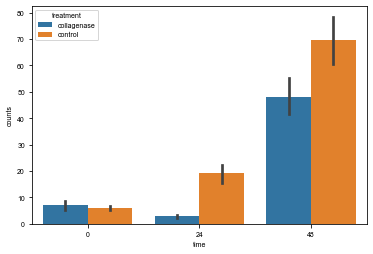

In [28]:
# Read in the data and put into a data frame
datasetPrefix = "20200117-0119-collagenase-recovery-tifs"
df = getCountDFbyPrefix(datasetPrefix, datasetFolder='../data/SMG-bud-count-collagenase-recovery/')

# Annotate the data set
#
# Group 1: time 0 of collagenase treatment and recovery group
# Group 2: time 0 of control group
# Group 3: time 24 h of collagenase treatment and recovery group
# Group 4, time 24 h of control group
# Group 5: time 48 h of collagenase treatment and recovery group
# Group 6, time 48 h of control group
groups = ["1"]*11 + ["2"]*11 + ["3"]*11 + ["4"]*11 + ["5"]*11 + ["6"]*11
df["groups"] = groups

# Groups of treatment
treatment = ["collagenase"]*11 + ["control"]*11 + ["collagenase"]*11 + ["control"]*11 + ["collagenase"]*11 + ["control"]*11
df["treatment"] = treatment

# Time points:
time = [0]*22 + [24]*22 + [48]*22
df["time"] = time

df.shape
df.head()

# # Inspect raw data if curious about how they look
# sns.swarmplot(df.groups, df.counts)
# sns.swarmplot(x='time', y='counts', hue='treatment', data=df)
sns.barplot(x='time', y='counts', hue='treatment', data=df)


In [29]:
# Normalize data by dividing the counts by the time 0 counts for plotting
counts_t0 = df.counts.values[:22]
print(counts_t0)
counts_t24 = df.counts.values[22:44]
print(counts_t24)
df['ratio_of_counts'] = df.counts / np.concatenate([counts_t0, counts_t0, counts_t24])
df['log2ratio_of_counts'] = np.log2(df.ratio_of_counts)

df.head()


[ 8  3  4  7 10  9  8  3  5 13  7  5  6  5  6  7  9  6  4  5  7  6]
[ 3  2  2  4  3  4  2  2  2  4  3 24 24 12 21 25 22 21  6 22 23 13]


,file_name,scrambled_file_name,counts,groups,treatment,time,ratio_of_counts,log2ratio_of_counts
0,2020-01-17-collagenase-recovery-collagenase20-...,fb7a7b561c6cc4050adf761be6e9a164.tif,8,1,collagenase,0,1.0,0.0
1,2020-01-17-collagenase-recovery-collagenase20-...,d3fda32d683844d50390208c78e1f225.tif,3,1,collagenase,0,1.0,0.0
2,2020-01-17-collagenase-recovery-collagenase20-...,1462cc3b204becb43eeaab1d4740d5e7.tif,4,1,collagenase,0,1.0,0.0
3,2020-01-17-collagenase-recovery-collagenase20-...,b21ba2f7e1b168a4f1b69f9fb89a542a.tif,7,1,collagenase,0,1.0,0.0
4,2020-01-17-collagenase-recovery-collagenase20-...,3a4709d440dcdf17f67ce645bf086547.tif,10,1,collagenase,0,1.0,0.0


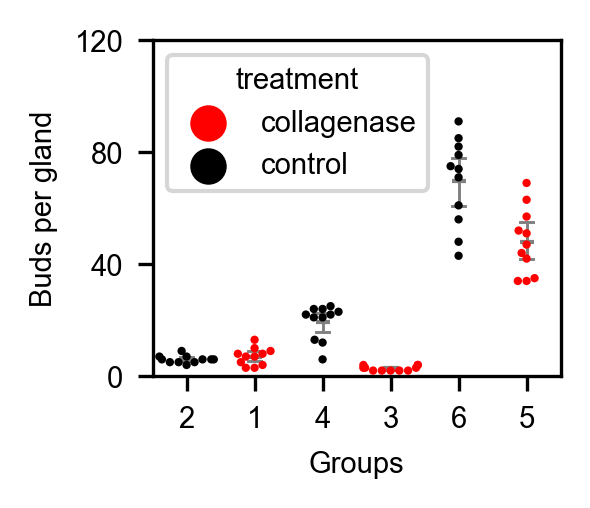

In [24]:
# Make swarm plot with error bars for the raw counts

fig_width, fig_height = 1.7, 1.4
fig = plt.figure(figsize=(fig_width,fig_height), dpi=300)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

ax = sns.swarmplot(x='groups', y='counts', data=df,
                   hue='treatment', palette={'control': 'black', 'collagenase': 'red'},
                   size=2, order=['2', '1', '4', '3', '6', '5'])
ax = sns.pointplot(x='groups', y='counts', data=df, order=['2', '1', '4', '3', '6', '5'],
                   ci=95, capsize=.2, errwidth=.7,
                   markers='_', scale=.5, join=False, color="Gray")

plt.ylim(0, 120)
plt.yticks([0, 40, 80, 120])

plt.xlabel("Groups")
plt.ylabel("Buds per gland")

for o in fig.findobj():
    o.set_clip_on(False)
for o in ax.findobj():
    o.set_clip_on(False)

outputFigPath = '../jupyter_figures/' + datasetPrefix + '-bud-count.svg'
plt.savefig(outputFigPath)


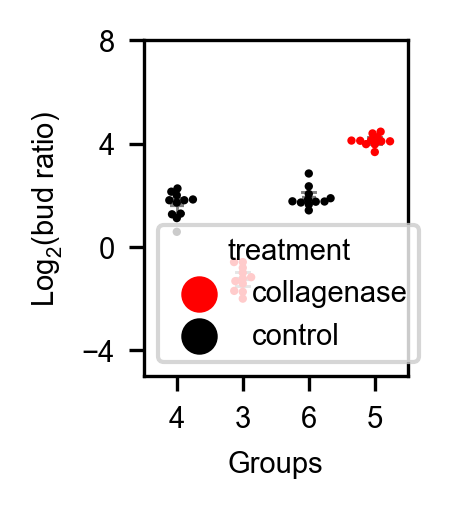

In [26]:
# Make swarm plot with error bars for the log2 ratio of counts

fig_width, fig_height = 1.1, 1.4
fig = plt.figure(figsize=(fig_width,fig_height), dpi=300)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

ax = sns.swarmplot(x='groups', y='log2ratio_of_counts', data=df,
                   hue='treatment', palette={'control': 'black', 'collagenase': 'red'},
                   size=2, order=['4', '3', '6', '5'])
ax = sns.pointplot(x='groups', y='log2ratio_of_counts', data=df, order=['4', '3', '6', '5'],
                   ci=95, capsize=.2, errwidth=.7,
                   markers='_', scale=.5, join=False, color="Gray")

plt.xlabel("Groups")
plt.ylabel("$\mathregular{Log_2}$(bud ratio)")

plt.ylim(-5, 8)
plt.yticks([-4, 0, 4, 8])

for o in fig.findobj():
    o.set_clip_on(False)
for o in ax.findobj():
    o.set_clip_on(False)

outputFigPath = '../jupyter_figures/' + datasetPrefix + '-log2-ratio-of-counts.svg'
plt.savefig(outputFigPath)


In [30]:
# Group 1: time 0 of collagenase treatment and recovery group
# Group 2: time 0 of control group
# Group 3: time 24 h of collagenase treatment and recovery group
# Group 4, time 24 h of control group
# Group 5: time 48 h of collagenase treatment and recovery group
# Group 6, time 48 h of control group

tukeyTest(df.counts, df.groups)

Summary of test:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2     -1.0    0.9  -11.637   9.637  False
     1      3  -4.1818 0.8387 -14.8189  6.4552  False
     1      4  12.3636 0.0137   1.7266 23.0007   True
     1      5     41.0  0.001   30.363  51.637   True
     1      6  62.5455  0.001  51.9084 73.1825   True
     2      3  -3.1818    0.9 -13.8189  7.4552  False
     2      4  13.3636  0.006   2.7266 24.0007   True
     2      5     42.0  0.001   31.363  52.637   True
     2      6  63.5455  0.001  52.9084 74.1825   True
     3      4  16.5455  0.001   5.9084 27.1825   True
     3      5  45.1818  0.001  34.5448 55.8189   True
     3      6  66.7273  0.001  56.0902 77.3643   True
     4      5  28.6364  0.001  17.9993 39.2734   True
     4      6  50.1818  0.001  39.5448 60.8189   True
     5      6  21.5455  0.001  10.9084 32.1825   True
----------

In [31]:
# Group 1: time 0 of collagenase treatment and recovery group
# Group 2: time 0 of control group
# Group 3: time 24 h of collagenase treatment and recovery group
# Group 4, time 24 h of control group
# Group 5: time 48 h of collagenase treatment and recovery group
# Group 6, time 48 h of control group

tukeyTest(df.ratio_of_counts, df.groups)

Summary of test:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     1      2      0.0    0.9  -1.5392   1.5392  False
     1      3  -0.5536 0.8943  -2.0928   0.9856  False
     1      4   2.2335  0.001   0.6943   3.7727   True
     1      5  16.4773  0.001   14.938  18.0165   True
     1      6   2.8974  0.001   1.3582   4.4367   True
     2      3  -0.5536 0.8943  -2.0928   0.9856  False
     2      4   2.2335  0.001   0.6943   3.7727   True
     2      5  16.4773  0.001   14.938  18.0165   True
     2      6   2.8974  0.001   1.3582   4.4367   True
     3      4   2.7871  0.001   1.2478   4.3263   True
     3      5  17.0309  0.001  15.4916  18.5701   True
     3      6    3.451  0.001   1.9118   4.9903   True
     4      5  14.2438  0.001  12.7046   15.783   True
     4      6    0.664 0.7752  -0.8753   2.2032  False
     5      6 -13.5798  0.001 -15.1191 -12.0406

In [11]:
# Group 1: time 0 of collagenase treatment and recovery group
# Group 2: time 0 of control group
# Group 3: time 24 h of collagenase treatment and recovery group
# Group 4, time 24 h of control group
# Group 5: time 48 h of collagenase treatment and recovery group
# Group 6, time 48 h of control group

tukeyTest(df.log2ratio_of_counts, df.groups)

Summary of test:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2      0.0    0.9 -0.4179  0.4179  False
     1      3  -1.2313  0.001 -1.6492 -0.8133   True
     1      4   1.6201  0.001  1.2022   2.038   True
     1      5   4.1134  0.001  3.6955  4.5313   True
     1      6   1.9095  0.001  1.4916  2.3274   True
     2      3  -1.2313  0.001 -1.6492 -0.8133   True
     2      4   1.6201  0.001  1.2022   2.038   True
     2      5   4.1134  0.001  3.6955  4.5313   True
     2      6   1.9095  0.001  1.4916  2.3274   True
     3      4   2.8514  0.001  2.4334  3.2693   True
     3      5   5.3447  0.001  4.9267  5.7626   True
     3      6   3.1408  0.001  2.7229  3.5587   True
     4      5   2.4933  0.001  2.0754  2.9112   True
     4      6   0.2894 0.3334 -0.1285  0.7074  False
     5      6  -2.2039  0.001 -2.6218 -1.7859   True
----------------------------

In [33]:
# df.head()
df['log10counts'] = np.log10(df.counts)

In [34]:
tukeyTest(df.log10counts, df.groups)

Summary of test:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2  -0.0331    0.9 -0.2181  0.1519  False
     1      3  -0.3706  0.001 -0.5557 -0.1856   True
     1      4   0.4546  0.001  0.2696  0.6396   True
     1      5   0.8676  0.001  0.6826  1.0526   True
     1      6   1.0294  0.001  0.8444  1.2144   True
     2      3  -0.3376  0.001 -0.5226 -0.1526   True
     2      4   0.4877  0.001  0.3027  0.6727   True
     2      5   0.9007  0.001  0.7157  1.0857   True
     2      6   1.0625  0.001  0.8775  1.2475   True
     3      4   0.8253  0.001  0.6403  1.0103   True
     3      5   1.2383  0.001  1.0532  1.4233   True
     3      6   1.4001  0.001  1.2151  1.5851   True
     4      5    0.413  0.001   0.228   0.598   True
     4      6   0.5748  0.001  0.3898  0.7598   True
     5      6   0.1618 0.1198 -0.0232  0.3468  False
----------------------------

<AxesSubplot:xlabel='groups', ylabel='log10counts'>

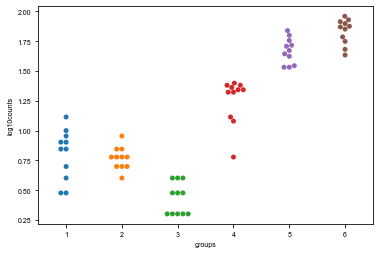

In [35]:
sns.swarmplot(df.groups, df.log10counts)

In [39]:
df_control_end = df[df.groups=='6']
df_collagenase_end = df[df.groups=='5']

In [40]:
from scipy.stats import ttest_ind
ttest_ind(df_control_end.log10counts, df_collagenase_end.log10counts)

Ttest_indResult(statistic=3.57957711575716, pvalue=0.0018751955381959993)

In [42]:
( df_collagenase_end.counts.mean()-df_control_end.counts.mean() ) / df_control_end.counts.mean()

-0.30980392156862746

In [45]:
df.groupby('groups').describe()['ratio_of_counts']

,count,mean,std,min,25%,50%,75%,max
groups,,,,,,,,
1,11.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,11.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,11.0,0.446406,0.142253,0.250000,0.341346,0.428571,0.535714,0.666667
4,11.0,3.233478,1.006063,1.500000,2.422222,3.500000,3.785714,4.800000
5,11.0,17.477273,2.536153,12.750000,16.375000,17.250000,18.250000,22.000000
6,11.0,3.897437,1.248251,2.666667,3.327652,3.400000,3.914336,7.166667
